In [2]:
import pandas as pd 
import numpy as np
from sklearn.linear_model import LinearRegression
import io
import base64
import pdfcrowd

In [3]:
person = pd.read_csv("name.basics.tsv",sep="\t")
basics = pd.read_csv("title.basics.tsv",sep="\t")
ratings = pd.read_csv("title.ratings.tsv",sep="\t")

In [4]:
temp_basics = basics[basics["startYear"] != "\\N"]
temp_basics = temp_basics.astype({"startYear":"int"})

In [5]:
temp_basics.dtypes

tconst            object
titleType         object
primaryTitle      object
originalTitle     object
isAdult           object
startYear          int32
endYear           object
runtimeMinutes    object
genres            object
dtype: object

In [6]:
sol = pd.merge(temp_basics,ratings,on="tconst")

In [7]:
sol.head(20)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.7,1713
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",6.0,211
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",6.5,1474
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short",6.1,124
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",6.2,2276
5,tt0000006,short,Chinese Opium Den,Chinese Opium Den,0,1894,\N,1,Short,5.1,127
6,tt0000007,short,Corbett and Courtney Before the Kinetograph,Corbett and Courtney Before the Kinetograph,0,1894,\N,1,"Short,Sport",5.5,692
7,tt0000008,short,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0,1894,\N,1,"Documentary,Short",5.5,1883
8,tt0000009,short,Miss Jerry,Miss Jerry,0,1894,\N,40,"Romance,Short",5.8,156
9,tt0000010,short,Leaving the Factory,La sortie de l'usine Lumière à Lyon,0,1895,\N,1,"Documentary,Short",6.9,6367


In [8]:
#Find the 20 most popular movies with a rank more than 8.0
sol_8 = sol[sol["averageRating"] >= 8.0]

In [9]:
sol_20_movies = sol_8[sol_8['titleType'] == "movie"]

In [10]:
sol_20_movies = sol_20_movies.sort_values(by=["averageRating"],ascending=False)

In [11]:
sol_20_movies.head(20)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
631834,tt14534636,movie,Love Qubool Hai,Love Qubool Hai,0,2020,\N,94,"Drama,Romance",10.0,6
638895,tt14800220,movie,Malefice: A True Story of a Demonic Haunting,Malefice: A True Story of a Demonic Haunting,0,2021,\N,92,Documentary,10.0,28
636897,tt14715806,movie,Dee Renjie's Burning Sky Extraordinary Fire,Dee Renjie's Burning Sky Extraordinary Fire,0,2020,\N,80,Action,10.0,11
1097438,tt7998218,movie,The Jewel,The Jewel,0,2016,\N,45,Documentary,10.0,6
625205,tt14309742,movie,Disconnect,Disconnect,0,2020,\N,\N,"Drama,Musical",10.0,5
637303,tt1473046,movie,The Unseen Side of Aphrodite,I atheati plevra tis Afroditis,0,2003,\N,74,Documentary,10.0,5
593008,tt1338619,movie,Impedimento,Impedimento,0,2008,\N,85,Drama,10.0,5
454438,tt10250790,movie,Konpaku,Konpaku,0,2019,\N,109,"Horror,Romance",10.0,7
475152,tt10663998,movie,Widow of the Revolution: The Anna Larina Story,Widow of the Revolution: The Anna Larina Story,0,2000,\N,\N,Documentary,10.0,7
633390,tt14587212,movie,Johnny Depp: King of Cult,Johnny Depp: King of Cult,0,2021,\N,\N,"Biography,Documentary",10.0,194


In [12]:
#Find the 20 best rated movies with over 40,000 votes in the 2000s(year>=2000)
sol_40k = sol[(sol["numVotes"] >= 40000) & (sol["startYear"] >= 2000) & (sol["titleType"] == "movie")]

In [13]:
sol_40k = sol_40k.sort_values(by=["averageRating"],ascending=False)

In [14]:
sol_40k["primaryTitle"].head(20)

794025                                CM101MMXI Fundamentals
451298                                       Soorarai Pottru
248127                                       The Dark Knight
113432         The Lord of the Rings: The Return of the King
89836      The Lord of the Rings: The Fellowship of the Ring
606989                                             Inception
113433                 The Lord of the Rings: The Two Towers
987565                                       The Mountain II
150224                                         Spirited Away
185235                                           City of God
1039466                                             Parasite
391637                                          Interstellar
115878                                             Gladiator
623264                                                 Senna
223669                                          The Departed
254056                                          The Prestige
153887                  

In [15]:
#Analysis
import pandas as pd 
import numpy as np
import re
from matplotlib import pyplot as plt

In [16]:
#Using Imdb movie rating data
basics = pd.read_csv("title.basics.tsv",sep="\t")
ratings = pd.read_csv("title.ratings.tsv",sep="\t")

In [17]:
basics.to_csv("title.basics.csv")
ratings.to_csv("title.ratings.csv")

In [18]:
basics.dtypes

tconst            object
titleType         object
primaryTitle      object
originalTitle     object
isAdult           object
startYear         object
endYear           object
runtimeMinutes    object
genres            object
dtype: object

In [19]:
basics.head()


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [20]:
basics["runtimeMinutes"] = pd.to_numeric(basics["runtimeMinutes"],errors="coerce")
basics["startYear"] = pd.to_numeric(basics["startYear"],errors="coerce")
basics["endYear"] = pd.to_numeric(basics["endYear"],errors="coerce")
basics = basics.astype({"isAdult":bool})

In [21]:
movies = sol[sol["titleType"] == "movie"]
movies

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
340,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N,4.5,8
374,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography",6.1,637
383,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,\N,90,Drama,5.2,6
398,tt0000615,movie,Robbery Under Arms,Robbery Under Arms,0,1907,\N,\N,Drama,4.5,14
406,tt0000630,movie,Hamlet,Amleto,0,1908,\N,\N,Drama,3.8,12
...,...,...,...,...,...,...,...,...,...,...,...
1165805,tt9916190,movie,Safeguard,Safeguard,0,2020,\N,90,"Action,Adventure,Thriller",3.5,139
1165811,tt9916270,movie,Il talento del calabrone,Il talento del calabrone,0,2020,\N,84,Thriller,5.8,1076
1165814,tt9916362,movie,Coven,Akelarre,0,2020,\N,92,"Adventure,Drama,History",6.3,3425
1165817,tt9916428,movie,The Secret of China,Hong xing zhao yao Zhong guo,0,2019,\N,\N,"Adventure,History,War",3.8,12


In [22]:
#Find the average rank of the 0 most popular movies between 2000-2009 (inclusive)
movies_year_2000_2009 = movies[(movies["startYear"] >= 2000) & (movies["startYear"] <= 2009)]
movies_year_2000_2009 = movies_year_2000_2009.sort_values(by=["averageRating"],ascending=False)
movies_year_2000_2009.head(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
475152,tt10663998,movie,Widow of the Revolution: The Anna Larina Story,Widow of the Revolution: The Anna Larina Story,0,2000,\N,\N,Documentary,10.0,7
593008,tt1338619,movie,Impedimento,Impedimento,0,2008,\N,85,Drama,10.0,5
637303,tt1473046,movie,The Unseen Side of Aphrodite,I atheati plevra tis Afroditis,0,2003,\N,74,Documentary,10.0,5
618859,tt14106898,movie,Meu Melhor Amigo,Meu Melhor Amigo,0,2006,\N,\N,Drama,10.0,7
585778,tt1320229,movie,L'aria del lago,L'aria del lago,0,2007,\N,104,"Drama,History,War",9.8,5
624382,tt1427969,movie,The Lost Spirits,The Lost Spirits,0,2009,\N,70,Documentary,9.8,5
236689,tt0439217,movie,Indocumentados,Indocumentados,0,2004,\N,89,Drama,9.8,10
813263,tt2906986,movie,Pimpalation: Return of the Trill,Pimpalation: Return of the Trill,0,2006,\N,60,"Documentary,Music",9.8,5
248187,tt0468742,movie,Gachapon,Gachapon,0,2004,\N,124,Drama,9.8,5
534793,tt1192418,movie,Kunku Zale Vairi,Kunku Zale Vairi,0,2005,\N,150,Drama,9.7,6


In [23]:
#Find the year in the 1900s when the average rank increased the most, compared to the previous year. (Ignore movies with votes < 1000)
movies_1900s = movies[(movies["startYear"] >= 1900) & (movies["startYear"] <= 2000)]
movies_1900s = movies_1900s[movies_1900s["numVotes"] >= 1000]
movies_1900s = movies_1900s.sort_values(by="startYear")

In [24]:
movies_1900s.head()


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
994,tt0002130,movie,Dante's Inferno,L'Inferno,0,1911,\N,71,"Adventure,Drama,Fantasy",7.0,2485
1187,tt0002844,movie,Fantômas: In the Shadow of the Guillotine,Fantômas - À l'ombre de la guillotine,0,1913,\N,54,"Crime,Drama",7.0,2059
1217,tt0003014,movie,Ingeborg Holm,Ingeborg Holm,0,1913,\N,96,Drama,7.0,1058
1222,tt0003037,movie,Fantomas: The Man in Black,Juve contre Fantômas,0,1913,\N,61,"Crime,Drama",7.0,1417
1243,tt0003165,movie,Fantômas: The Dead Man Who Killed,Le mort qui tue,0,1913,\N,90,"Crime,Drama,Mystery",7.0,1105


In [25]:
movies_1900yearwise_total_avg_rank = movies_1900s.groupby(["startYear"]).mean()
movies_1900yearwise_total_avg_rank

,averageRating,numVotes
startYear,,
1911,7.000000,2485.000000
1913,6.900000,1505.400000
1914,6.560000,2046.400000
1915,6.780000,6442.000000
1916,6.950000,8047.500000
...,...,...
1996,6.335411,27855.758105
1997,6.415506,36974.577528
1998,6.430152,36184.216920


In [26]:
movies_1900yearwise_total_avg_rank["increased_rank"] = movies_1900yearwise_total_avg_rank["averageRating"] - movies_1900yearwise_total_avg_rank["averageRating"].shift(1)
movies_1900yearwise_total_avg_rank

,averageRating,numVotes,increased_rank
startYear,,,
1911,7.000000,2485.000000,NaN
1913,6.900000,1505.400000,-0.100000
1914,6.560000,2046.400000,-0.340000
1915,6.780000,6442.000000,0.220000
1916,6.950000,8047.500000,0.170000
...,...,...,...
1996,6.335411,27855.758105,-0.073703
1997,6.415506,36974.577528,0.080094
1998,6.430152,36184.216920,0.014646


In [27]:
movies_1900yearwise_total_avg_rank = movies_1900yearwise_total_avg_rank.sort_values(by="increased_rank",ascending=False)
movies_1900yearwise_total_avg_rank.head(1)

,averageRating,numVotes,increased_rank
startYear,,,
1919,6.946154,2037.923077,0.296154


In [28]:
movies_Votes_greater_1000 = movies[movies['numVotes'] >= 1000]

In [29]:

movies_yearwise_total_avg_rank = movies_Votes_greater_1000.groupby(["startYear"]).mean()
movies_yearwise_total_avg_rank.index

Int64Index([1911, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921,
            ...
            2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
           dtype='int64', name='startYear', length=110)

In [30]:
movies_yearwise_total_avg_rank.reset_index(level=0, inplace=True)

In [31]:
movies_yearwise_total_avg_rank

,startYear,averageRating,numVotes
0,1911,7.000000,2485.000000
1,1913,6.900000,1505.400000
2,1914,6.560000,2046.400000
3,1915,6.780000,6442.000000
4,1916,6.950000,8047.500000
...,...,...,...
105,2017,6.180152,20804.443346
106,2018,6.257188,18908.752553
107,2019,6.250997,20304.997398
108,2020,6.127880,12584.544503


In [33]:
movies_yearwise_total_avg_rank[movies_yearwise_total_avg_rank['startYear'] == 2013]

,startYear,averageRating,numVotes
101,2013,6.204392,32748.44848


In [34]:
#Find the expected average rank for 2013 using linear regression. How good is this regression? (Ignore movies with votes < 1000.)
from sklearn.linear_model import LinearRegression

In [35]:
LinearModel = LinearRegression()

In [36]:

x = np.array(movies_yearwise_total_avg_rank['numVotes']).reshape(-1, 1)
y = movies_yearwise_total_avg_rank['averageRating']

In [37]:
LinearModel.fit(x, y)

LinearRegression()

In [38]:
movies_2013 = movies_Votes_greater_1000[(movies["startYear"] == 2013) & (movies['numVotes'] >= 1000)]
movies_2013

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
202134,tt0359950,movie,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,0,2013,\N,114,"Adventure,Comedy,Drama",7.3,298914
224207,tt0409379,movie,In Secret,In Secret,0,2013,\N,107,"Crime,Drama,Thriller",6.1,7930
242465,tt0453562,movie,42,42,0,2013,\N,128,"Biography,Drama,Sport",7.5,88689
246563,tt0463960,movie,The Devil You Know,The Devil You Know,0,2013,\N,76,"Mystery,Thriller",3.4,1638
248288,tt0469021,movie,Alan Partridge,Alan Partridge: Alpha Papa,0,2013,\N,90,"Action,Comedy,Crime",6.9,30211
...,...,...,...,...,...,...,...,...,...,...,...
863192,tt3663040,movie,Heatstroke,Heatstroke,0,2013,\N,92,"Action,Thriller",4.8,2933
867160,tt3720788,movie,The Disappearance of Eleanor Rigby: Her,The Disappearance of Eleanor Rigby: Her,0,2013,\N,100,"Drama,Romance",6.9,8832
888914,tt4097826,movie,The Firefly,La luciérnaga,0,2013,\N,85,"Drama,Fantasy,Romance",6.1,1147
889034,tt4103686,movie,City of God: 10 Years Later,Cidade de Deus: 10 Anos Depois,0,2013,\N,70,Documentary,6.4,1204


In [39]:
movies_2013_avg = movies_2013.mean()
movies_2013_avg['numVotes']

32748.44847972973

In [40]:
movies_2013_avg_numVotes = movies_2013_avg['numVotes']
movies_2013_avg_numVotes

32748.44847972973

In [41]:
movies_2013_avg_numVotes = movies_2013_avg_numVotes.reshape(1, -1)

In [42]:
LinearModel.predict(movies_2013_avg_numVotes)

array([6.30313016])

In [43]:
#Find the correlation between rank and votes for each year in the 1900s. By how much did the correlation coefficient grow each year? How good is this regression?
movies_1900s["averageRating"].corr(movies_1900s["numVotes"])

0.1903654414164788

In [44]:
groupby_year = movies_1900s.groupby(by="startYear")
years = groupby_year.groups.keys()
yearly_correlation = {}
for year in years:
    year_group = groupby_year.get_group(year)
    yearly_correlation[year] = year_group["averageRating"].corr(year_group["numVotes"])
yearly_correlation = pd.DataFrame(yearly_correlation.items(),columns=["year","correlation"])
yearly_correlation.sort_values(by="year")
yearly_correlation

,year,correlation
0,1911,NaN
1,1913,-0.472049
2,1914,0.285461
3,1915,-0.651775
4,1916,1.000000
...,...,...
84,1996,0.200733
85,1997,0.233088
86,1998,0.245823
87,1999,0.250094


In [45]:
#Draw a scatterplot of rank vs votes for every movie with at least 10,000 votes. (x-axis=votes, y-axis=rank)
movies_10000 = movies[movies["numVotes"] >= 10000]

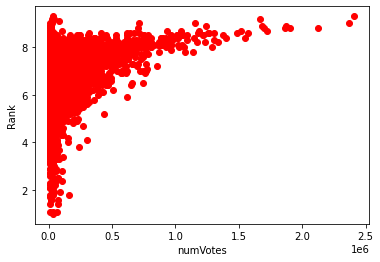

In [46]:
plt.scatter(movies_10000["numVotes"],movies_10000["averageRating"],color = "r")
plt.xlabel("numVotes")
plt.ylabel("Rank")
plt.show()

In [47]:
#Using Tornado Templates, draw a bar graph of the number of movies by year since 1900
movies_since_1900 = movies[movies['startYear'] >= 1900]
movies_since_1900

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
340,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N,4.5,8
374,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography",6.1,637
383,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,\N,90,Drama,5.2,6
398,tt0000615,movie,Robbery Under Arms,Robbery Under Arms,0,1907,\N,\N,Drama,4.5,14
406,tt0000630,movie,Hamlet,Amleto,0,1908,\N,\N,Drama,3.8,12
...,...,...,...,...,...,...,...,...,...,...,...
1165805,tt9916190,movie,Safeguard,Safeguard,0,2020,\N,90,"Action,Adventure,Thriller",3.5,139
1165811,tt9916270,movie,Il talento del calabrone,Il talento del calabrone,0,2020,\N,84,Thriller,5.8,1076
1165814,tt9916362,movie,Coven,Akelarre,0,2020,\N,92,"Adventure,Drama,History",6.3,3425
1165817,tt9916428,movie,The Secret of China,Hong xing zhao yao Zhong guo,0,2019,\N,\N,"Adventure,History,War",3.8,12


In [48]:

movies_count = movies_since_1900.groupby(['startYear']).count()
movies_count

,tconst,titleType,primaryTitle,originalTitle,isAdult,endYear,runtimeMinutes,genres,averageRating,numVotes
startYear,,,,,,,,,,
1900,2,2,2,2,2,2,2,2,2,2
1901,1,1,1,1,1,1,1,1,1,1
1902,1,1,1,1,1,1,1,1,1,1
1903,1,1,1,1,1,1,1,1,1,1
1904,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
2017,9757,9757,9757,9757,9757,9757,9757,9757,9757,9757
2018,9618,9618,9618,9618,9618,9618,9618,9618,9618,9618
2019,9359,9359,9359,9359,9359,9359,9359,9359,9359,9359


In [49]:
movies_count.reset_index(level=0, inplace=True)
movies_count

,startYear,tconst,titleType,primaryTitle,originalTitle,isAdult,endYear,runtimeMinutes,genres,averageRating,numVotes
0,1900,2,2,2,2,2,2,2,2,2,2
1,1901,1,1,1,1,1,1,1,1,1,1
2,1902,1,1,1,1,1,1,1,1,1,1
3,1903,1,1,1,1,1,1,1,1,1,1
4,1904,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
117,2017,9757,9757,9757,9757,9757,9757,9757,9757,9757,9757
118,2018,9618,9618,9618,9618,9618,9618,9618,9618,9618,9618
119,2019,9359,9359,9359,9359,9359,9359,9359,9359,9359,9359
120,2020,6597,6597,6597,6597,6597,6597,6597,6597,6597,6597


In [50]:
def bar_graph(x, y, img, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(x, y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.savefig(img, transparent=True, bbox_inches='tight')
    plt.show()
    img.seek(0)

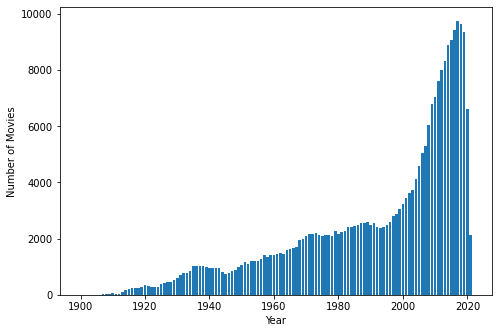

In [51]:
img = io.BytesIO()
bar_graph(movies_count['startYear'], movies_count['titleType'], img, "Year", "Number of Movies")
res = base64.b64encode(img.read()).decode("UTF-8")
with open("imdb_bargraph.html", "w") as file:
    file.write('<div><img src="data:image/png;base64,{}"/></div>'.format(res))

In [52]:
#Convert these files into PDF without using a browser
client = pdfcrowd.HtmlToPdfClient('demo', 'ce544b6ea52a5621fb9d55f8b542d14d')
client.convertFileToFile('imdb_bargraph.html', 'imdb_bargraph.pdf')